In [1]:
from __future__ import annotations
from typing import TYPE_CHECKING

if TYPE_CHECKING:
    from typing import Literal

import os
import re
from glob import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
import emoji

In [2]:
path_to_datasets = "{}\\datasets".format(os.getcwd())
all_datasets = (pd.read_csv(f) for f in glob(os.path.join(path_to_datasets, "*.csv")))

# data = pd.read_csv('./ikram.csv', encoding_errors='replace')
data = pd.concat(all_datasets, ignore_index=True)

In [4]:
data

,name,review,contrib,humanized_timestamp,minires_images,stars.label,stars.value,Unnamed: 0
0,Fachrul Rozie F,"OK, I have it",Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,NaN
1,Fachrul Rozie F,The place is good for taking photos,Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,NaN
2,Teras,A unique and interesting island located in the...,"Local Guide · 595 reviews · 3,079 photos",4 years ago,[no_minires_images],5 stars,5,NaN
3,baim Journey,One of the tourist destinations on Kumala Isla...,Local Guide · 99 reviews · 401 photos,6 years ago,['https://lh5.googleusercontent.com/p/AF1QipMg...,5 stars,5,NaN
4,Gustian Garang,"Amazing... As a Dayak person, I am very proud ...",4 reviews · 10 photos,a year ago,[no_minires_images],5 stars,5,NaN
...,...,...,...,...,...,...,...,...
641,A. N. M.,[no_review],Local Guide,6 years ago,NaN,4 stars,4,3.0
642,Subandi Channel,[no_review],Local Guide · 11 reviews · 10 photos,7 years ago,NaN,2 stars,2,4.0
643,Majlis Ta'lim Albakuni,[no_review],Local Guide · 33 reviews · 66 photos,7 years ago,NaN,5 stars,5,5.0
644,baboon pk,[no_review],Local Guide · 17 reviews · 66 photos,8 years ago,NaN,3 stars,3,6.0


In [3]:
def remove_empty_review (review: str) -> str:
    return None if review == "[no_review]" else review

def remove_urls (text: str):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

def convert_emojis (text: str):
    return emoji.demojize(text)

def label_data (star: int) -> Literal['positive', 'negative', 'neutral']:
    if star >= 4:
        return 'positive'
    elif star == 3:
        return 'neutral'
    else:
        return 'negative'

In [4]:
data['review'] = data['review'].apply(remove_empty_review)
data = data.dropna(subset=['review'])
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,name,review,contrib,humanized_timestamp,minires_images,stars.label,stars.value
0,Fachrul Rozie F,"OK, I have it",Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5
1,Fachrul Rozie F,The place is good for taking photos,Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5
2,Teras,A unique and interesting island located in the...,"Local Guide · 595 reviews · 3,079 photos",4 years ago,[no_minires_images],5 stars,5
3,baim Journey,One of the tourist destinations on Kumala Isla...,Local Guide · 99 reviews · 401 photos,6 years ago,['https://lh5.googleusercontent.com/p/AF1QipMg...,5 stars,5
4,Gustian Garang,"Amazing... As a Dayak person, I am very proud ...",4 reviews · 10 photos,a year ago,[no_minires_images],5 stars,5


In [5]:
# remove urls
data['review'] = data['review'].apply(remove_urls)
# convert emojis
data['review'] = data['review'].apply(convert_emojis)
# case folding
# data['review'] = data['review'].apply(lambda x: x.lower())
# labelling data
# data['sentiment'] = data['stars.value'].apply(label_data)

In [6]:
from transformers import BertTokenizer, BertForSequenceClassification

d:\suarasiy\skripsi\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# label encode sentiment
tokenizer = BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [8]:
import torch

In [9]:
# Function to tokenize the reviews
def predict_sentiment(review: str):
    inputs = tokenizer(review, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Get the models' predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # get the predicted label
    predicted_label = torch.argmax(outputs.logits, dim=1).item()
    return predicted_label


In [10]:
# Applyl the sentiment prediction function to the reviews
data['sentiment'] = data['review'].apply(predict_sentiment)

In [13]:
data

,name,review,contrib,humanized_timestamp,minires_images,stars.label,stars.value,sentiment
0,Fachrul Rozie F,"OK, I have it",Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,2
1,Fachrul Rozie F,The place is good for taking photos,Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,3
2,Teras,A unique and interesting island located in the...,"Local Guide · 595 reviews · 3,079 photos",4 years ago,[no_minires_images],5 stars,5,3
3,baim Journey,One of the tourist destinations on Kumala Isla...,Local Guide · 99 reviews · 401 photos,6 years ago,['https://lh5.googleusercontent.com/p/AF1QipMg...,5 stars,5,3
4,Gustian Garang,"Amazing... As a Dayak person, I am very proud ...",4 reviews · 10 photos,a year ago,[no_minires_images],5 stars,5,4
...,...,...,...,...,...,...,...,...
577,Helwan Syarif,"Tenggarong, East Kalimantan",Local Guide · 43 reviews · 602 photos,6 years ago,[no_minires_images],5 stars,5,3
609,Yasman ARDI,Excellent,Local Guide · 904 reviews · 438 photos,6 years ago,[no_minires_images],5 stars,5,4
638,Masyhurun Fiinaa,The place is not well maintained. There are lo...,Local Guide · 103 reviews · 473 photos,2 years ago,NaN,2 stars,2,1
639,Irfan Yourdani,The tower is good for children's play faciliti...,"Local Guide · 819 reviews · 3,236 photos",8 years ago,NaN,4 stars,4,2


In [ ]:
def extract_features(review: str):
    # Tokenize the review
    inputs = tokenizer(review, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Get the hidden states from the BERT model
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)

    # The hidden states are the output of the model
    hidden_states = outputs.hidden_states

    # Use the [CLS] token embedding as the sentence embedding
    cls_embedding = hidden_states[-1][:, 0, :].squeeze().numpy()

    return cls_embedding

# Apply the feature extraction to the 'review' column
data['bert_features'] = data['review'].apply(extract_features)

# Display the first few rows with the extracted features
data.head()

,name,review,contrib,humanized_timestamp,minires_images,stars.label,stars.value,sentiment,bert_features
0,Fachrul Rozie F,"OK, I have it",Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,2,"[0.021978065, 0.07565795, -0.057591636, -0.515..."
1,Fachrul Rozie F,The place is good for taking photos,Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,3,"[-0.2428127, -0.61732364, -0.2426435, 0.095686..."
2,Teras,A unique and interesting island located in the...,"Local Guide · 595 reviews · 3,079 photos",4 years ago,[no_minires_images],5 stars,5,3,"[0.4399781, -0.5964806, -0.17686953, 0.4701182..."
3,baim Journey,One of the tourist destinations on Kumala Isla...,Local Guide · 99 reviews · 401 photos,6 years ago,['https://lh5.googleusercontent.com/p/AF1QipMg...,5 stars,5,3,"[0.16553363, -0.21731222, -0.16979444, 0.08522..."
4,Gustian Garang,"Amazing... As a Dayak person, I am very proud ...",4 reviews · 10 photos,a year ago,[no_minires_images],5 stars,5,4,"[0.5537336, -0.4003766, -0.14024235, -0.071828..."


In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [13]:
# Convert the BERT features to a list of arrays
features = np.array(data['bert_features'].tolist())

# Apply Min-Max scaling to ensure all values are non-negative
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['sentiment'], test_size=0.3, random_state=42)

# Initialize the Naive Bayes classifier
clf = GaussianNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.8859060402684564
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.91      0.91      0.91        11
           2       0.76      0.93      0.84        30
           3       0.94      0.80      0.86        59
           4       0.91      0.95      0.93        43

    accuracy                           0.89       149
   macro avg       0.90      0.92      0.91       149
weighted avg       0.89      0.89      0.89       149



In [14]:
# import SelectKBest for chi-squared statistical test
from sklearn.feature_selection import SelectKBest, chi2

In [29]:
data

,name,review,contrib,humanized_timestamp,minires_images,stars.label,stars.value,sentiment,bert_features
0,Fachrul Rozie F,"OK, I have it",Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,2,"[0.021978065, 0.07565795, -0.057591636, -0.515..."
1,Fachrul Rozie F,The place is good for taking photos,Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,3,"[-0.2428127, -0.61732364, -0.2426435, 0.095686..."
2,Teras,A unique and interesting island located in the...,"Local Guide · 595 reviews · 3,079 photos",4 years ago,[no_minires_images],5 stars,5,3,"[0.4399781, -0.5964806, -0.17686953, 0.4701182..."
3,baim Journey,One of the tourist destinations on Kumala Isla...,Local Guide · 99 reviews · 401 photos,6 years ago,['https://lh5.googleusercontent.com/p/AF1QipMg...,5 stars,5,3,"[0.16553363, -0.21731222, -0.16979444, 0.08522..."
4,Gustian Garang,"Amazing... As a Dayak person, I am very proud ...",4 reviews · 10 photos,a year ago,[no_minires_images],5 stars,5,4,"[0.5537336, -0.4003766, -0.14024235, -0.071828..."
...,...,...,...,...,...,...,...,...,...
577,Helwan Syarif,"Tenggarong, East Kalimantan",Local Guide · 43 reviews · 602 photos,6 years ago,[no_minires_images],5 stars,5,3,"[0.007266119, -0.15634911, -0.08427003, -0.076..."
609,Yasman ARDI,Excellent,Local Guide · 904 reviews · 438 photos,6 years ago,[no_minires_images],5 stars,5,4,"[0.41097054, -0.3704045, -0.115588754, -0.0988..."
638,Masyhurun Fiinaa,The place is not well maintained. There are lo...,Local Guide · 103 reviews · 473 photos,2 years ago,NaN,2 stars,2,1,"[-0.34447896, 0.53141594, -0.3968784, -0.66520..."
639,Irfan Yourdani,The tower is good for children's play faciliti...,"Local Guide · 819 reviews · 3,236 photos",8 years ago,NaN,4 stars,4,2,"[-0.35000232, -0.034640513, -0.2346682, -0.243..."


In [16]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [17]:
# Convert the BERT features to a list of arrays
features = np.array(data['bert_features'].tolist())

# Apply Min-Max scaling to ensure all values are non-negative
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

k_values = [100, 200, 300, 400, 500]

best_k = 0
best_score = 0

for k in k_values:
    chi2_selector = SelectKBest(chi2, k=k)
    X_train_kbest = chi2_selector.fit_transform(X_train, y_train)

    clf = GaussianNB()

    scores = cross_val_score(clf, X_train_kbest, y_train, cv=5)
    mean_score = scores.mean()

    print (f'k={k}, mean accuracy={mean_score}')

    if mean_score > best_score: best_k = k; best_score = mean_score

print(f'Best k={best_k}, best score={best_score}')

# Split the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['sentiment'], test_size=0.3, random_state=42)

# Apply chi-square feature selection to select the top 500 features
chi2_selector = SelectKBest(chi2, k=best_k)
X_train_kbest = chi2_selector.fit_transform(X_train, y_train)
X_test_kbest = chi2_selector.transform(X_test)

# Train a Naive Bayes classifier on the selected features
clf = GaussianNB()
clf.fit(X_train_kbest, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test_kbest)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

k=100, mean accuracy=0.7149896480331263
k=200, mean accuracy=0.8041407867494824
k=300, mean accuracy=0.8588819875776398
k=400, mean accuracy=0.8646376811594203
k=500, mean accuracy=0.8790476190476191
Best k=500, best score=0.8790476190476191
Accuracy: 0.8993288590604027
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.92      1.00      0.96        11
           2       0.78      0.93      0.85        30
           3       0.92      0.83      0.88        59
           4       0.95      0.93      0.94        43

    accuracy                           0.90       149
   macro avg       0.91      0.94      0.92       149
weighted avg       0.91      0.90      0.90       149



In [37]:
# Convert the BERT features to a list of arrays
features = np.array(data['bert_features'].tolist())

# Apply Min-Max scaling to ensure all values are non-negative
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['sentiment'], test_size=0.3, random_state=42)

# Apply chi-square feature selection to select the top 500 features
k = 500  # Example value, adjust based on your dataset
chi2_selector = SelectKBest(chi2, k=k)
X_train_kbest = chi2_selector.fit_transform(X_train, y_train)
X_test_kbest = chi2_selector.transform(X_test)

# Train a Naive Bayes classifier on the selected features
clf = GaussianNB()
clf.fit(X_train_kbest, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test_kbest)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.8993288590604027
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.92      1.00      0.96        11
           2       0.78      0.93      0.85        30
           3       0.92      0.83      0.88        59
           4       0.95      0.93      0.94        43

    accuracy                           0.90       149
   macro avg       0.91      0.94      0.92       149
weighted avg       0.91      0.90      0.90       149



In [30]:
# convert the BERT features to a list of arrays
features = np.array(data['review'].tolist())

# apply Min-Max scaling to ensure all values are non-negative
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# split the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['sentiment'], train_size=0.7, random_state=42)

# Apply chi-square feature selection to select the top 1000 features
# select the top K features (you can adjust k as needed)
k = 500 # example value, adjust based on your dataset
chi2_selector = SelectKBest(chi2, k=k)
x_train_kbest = chi2_selector.fit_transform(X_train, y_train)
X_test_kbest = chi2_selector.transform(X_test)

# train a naive bayes classifier on the selected features
clf = GaussianNB()
clf.fit(x_train_kbest, y_train)

#  make predictions on the testing data
y_pred = clf.predict(X_test_kbest)

# evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

ValueError: could not convert string to float: np.str_('OK, I have it')

In [ ]:
data

In [7]:
from transformers import pipeline

# Initialize the sentiment-analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Apply the sentiment pipeline to the 'review' column
data['bert_sentiment'] = data['review'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

# Display the dataframe with the new 'bert_sentiment' column
data[['review', 'bert_sentiment']]

d:\suarasiy\skripsi\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,review,bert_sentiment
0,"OK, I have it",POSITIVE
1,The place is good for taking photos,POSITIVE
2,A unique and interesting island located in the...,POSITIVE
3,One of the tourist destinations on Kumala Isla...,POSITIVE
4,"Amazing... As a Dayak person, I am very proud ...",POSITIVE
...,...,...
577,"Tenggarong, East Kalimantan",POSITIVE
609,Excellent,POSITIVE
638,The place is not well maintained. There are lo...,NEGATIVE
639,The tower is good for children's play faciliti...,NEGATIVE


In [9]:
data

,name,review,contrib,humanized_timestamp,minires_images,stars.label,stars.value,bert_sentiment,sentiment
0,Fachrul Rozie F,"ok, i have it",Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive
1,Fachrul Rozie F,the place is good for taking photos,Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive
2,Teras,a unique and interesting island located in the...,"Local Guide · 595 reviews · 3,079 photos",4 years ago,[no_minires_images],5 stars,5,POSITIVE,positive
3,baim Journey,one of the tourist destinations on kumala isla...,Local Guide · 99 reviews · 401 photos,6 years ago,['https://lh5.googleusercontent.com/p/AF1QipMg...,5 stars,5,POSITIVE,positive
4,Gustian Garang,"amazing... as a dayak person, i am very proud ...",4 reviews · 10 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive
...,...,...,...,...,...,...,...,...,...
577,Helwan Syarif,"tenggarong, east kalimantan",Local Guide · 43 reviews · 602 photos,6 years ago,[no_minires_images],5 stars,5,POSITIVE,positive
609,Yasman ARDI,excellent,Local Guide · 904 reviews · 438 photos,6 years ago,[no_minires_images],5 stars,5,POSITIVE,positive
638,Masyhurun Fiinaa,the place is not well maintained. there are lo...,Local Guide · 103 reviews · 473 photos,2 years ago,NaN,2 stars,2,NEGATIVE,negative
639,Irfan Yourdani,the tower is good for children's play faciliti...,"Local Guide · 819 reviews · 3,236 photos",8 years ago,NaN,4 stars,4,NEGATIVE,positive


In [10]:
from transformers import BertTokenizer, BertModel

In [11]:
# tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# text = "Hello, how are you? 🙂"

# tokens = tokenizer.tokenize(text)
# print("Tokens:", tokens)

# input_ids = tokenizer.convert_tokens_to_ids(tokens)
# print("Input IDs:", input_ids)

d:\suarasiy\skripsi\env\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\busin\.cache\huggingface\hub\models--indobenchmark--indobert-base-p1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Tokens: ['hello', ',', 'how', 'are', 'you', '?', '[UNK]']
Input IDs: [7592, 1010, 2129, 2024, 2017, 1029, 100]


In [11]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [12]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [13]:
# Tokenize the text using the BERT tokenizer
# Define a function to preprocess the text using BERT tokenizer
def preprocess_bert_tokenization(text, tokenizer, max_length=128):
    tokens = tokenizer.tokenize(text)
    input_ids = tokenizer.convert_tokens_to_ids(tokens)
    # Pad or truncate the input_ids to max_length
    if len(input_ids) < max_length:
        input_ids += [tokenizer.pad_token_id] * (max_length - len(input_ids))
    else:
        input_ids = input_ids[:max_length]
    return input_ids

# Apply the preprocessing function to the 'review' column
data['input_ids'] = data['review'].apply(lambda x: preprocess_bert_tokenization(x, tokenizer))

# Display the dataframe with the new 'input_ids' column
data[['review', 'input_ids']]

,review,input_ids
0,"ok, i have it","[7929, 1010, 1045, 2031, 2009, 0, 0, 0, 0, 0, ..."
1,the place is good for taking photos,"[1996, 2173, 2003, 2204, 2005, 2635, 7760, 0, ..."
2,a unique and interesting island located in the...,"[1037, 4310, 1998, 5875, 2479, 2284, 1999, 199..."
3,one of the tourist destinations on kumala isla...,"[2028, 1997, 1996, 7538, 14345, 2006, 13970, 9..."
4,"amazing... as a dayak person, i am very proud ...","[6429, 1012, 1012, 1012, 2004, 1037, 2154, 481..."
...,...,...
577,"tenggarong, east kalimantan","[2702, 23033, 17583, 1010, 2264, 19924, 2386, ..."
609,excellent,"[6581, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
638,the place is not well maintained. there are lo...,"[1996, 2173, 2003, 2025, 2092, 5224, 1012, 204..."
639,the tower is good for children's play faciliti...,"[1996, 3578, 2003, 2204, 2005, 2336, 1005, 105..."


In [14]:
data

,name,review,contrib,humanized_timestamp,minires_images,stars.label,stars.value,bert_sentiment,sentiment,input_ids
0,Fachrul Rozie F,"ok, i have it",Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[7929, 1010, 1045, 2031, 2009, 0, 0, 0, 0, 0, ..."
1,Fachrul Rozie F,the place is good for taking photos,Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[1996, 2173, 2003, 2204, 2005, 2635, 7760, 0, ..."
2,Teras,a unique and interesting island located in the...,"Local Guide · 595 reviews · 3,079 photos",4 years ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[1037, 4310, 1998, 5875, 2479, 2284, 1999, 199..."
3,baim Journey,one of the tourist destinations on kumala isla...,Local Guide · 99 reviews · 401 photos,6 years ago,['https://lh5.googleusercontent.com/p/AF1QipMg...,5 stars,5,POSITIVE,positive,"[2028, 1997, 1996, 7538, 14345, 2006, 13970, 9..."
4,Gustian Garang,"amazing... as a dayak person, i am very proud ...",4 reviews · 10 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[6429, 1012, 1012, 1012, 2004, 1037, 2154, 481..."
...,...,...,...,...,...,...,...,...,...,...
577,Helwan Syarif,"tenggarong, east kalimantan",Local Guide · 43 reviews · 602 photos,6 years ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[2702, 23033, 17583, 1010, 2264, 19924, 2386, ..."
609,Yasman ARDI,excellent,Local Guide · 904 reviews · 438 photos,6 years ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[6581, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
638,Masyhurun Fiinaa,the place is not well maintained. there are lo...,Local Guide · 103 reviews · 473 photos,2 years ago,NaN,2 stars,2,NEGATIVE,negative,"[1996, 2173, 2003, 2025, 2092, 5224, 1012, 204..."
639,Irfan Yourdani,the tower is good for children's play faciliti...,"Local Guide · 819 reviews · 3,236 photos",8 years ago,NaN,4 stars,4,NEGATIVE,positive,"[1996, 3578, 2003, 2204, 2005, 2336, 1005, 105..."


In [15]:
import torch

In [16]:
def extract_features (review: str):
    # Tokenize the review
    inputs = tokenizer(review, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Get the hidden states from the BERT model
    with torch.no_grad():
        outputs = model(**inputs)

    # The last hidden state is the output of the model
    last_hidden_state = outputs.last_hidden_state

    # Use the [CLS] token embedding as the sentence embedding
    cls_embedding = last_hidden_state[:, 0, :].squeeze().numpy()

    return cls_embedding

# Apply the feature extraction to the 'review' column
data['review'] = data['review'].apply(extract_features)

# Display the first few rows with the extracted features
data.head()
    



,name,review,contrib,humanized_timestamp,minires_images,stars.label,stars.value,bert_sentiment,sentiment,input_ids
0,Fachrul Rozie F,"[-0.18781453, 0.15712726, 0.2112856, -0.193930...",Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[7929, 1010, 1045, 2031, 2009, 0, 0, 0, 0, 0, ..."
1,Fachrul Rozie F,"[0.13413121, 0.13372079, 0.13411452, -0.041422...",Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[1996, 2173, 2003, 2204, 2005, 2635, 7760, 0, ..."
2,Teras,"[-0.603967, -0.19823349, -0.22585413, -0.22799...","Local Guide · 595 reviews · 3,079 photos",4 years ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[1037, 4310, 1998, 5875, 2479, 2284, 1999, 199..."
3,baim Journey,"[-0.7103056, 0.103414916, -0.11037938, -0.3888...",Local Guide · 99 reviews · 401 photos,6 years ago,['https://lh5.googleusercontent.com/p/AF1QipMg...,5 stars,5,POSITIVE,positive,"[2028, 1997, 1996, 7538, 14345, 2006, 13970, 9..."
4,Gustian Garang,"[0.1241154, 0.29901516, -0.07769714, -0.609486...",4 reviews · 10 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[6429, 1012, 1012, 1012, 2004, 1037, 2154, 481..."


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

In [23]:

# convert the BERT features to a list of arrays
features = np.array(data['review'].tolist())

# split the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(features, data['bert_features'], test_size=.3, random_state=42)

# display the shapes of the resulting datasets
print(f'Training features shape: {X_train.shape}')
print(f'Testing features shape: {X_test.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Testing labels shape: {y_test.shape}')

Training features shape: (347,)
Testing features shape: (149,)
Training labels shape: (347,)
Testing labels shape: (149,)


In [ ]:
X_train

In [21]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.metrics import accuracy_score, classification_report

from sklearn.svm import SVC, LinearSVC, LinearSVR, NuSVC, NuSVR, SVR

In [24]:
# Initialize the Naive Bayes classifier
clf = BernoulliNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

ValueError: Expected 2D array, got 1D array instead:
array=['Good place to spend your several hours with your families or relatives, cause this place is really need more development to become a proper theme park.'
 ':thumbs_up::thumbs_up::thumbs_up::thumbs_up::thumbs_up::thumbs_up: …'
 'Icon of the Lembuswana temple with a dragon along with a throne and an exotic lamin house'
 'One of the tourist destinations on Kumala Island, Tenggarong district. Kutai Kartanegara which provides information about the customs and culture of the Dayak tribe as one of the ethnic groups in East Kalimantan'
 'Statue of Kutai Kertanegara Emblem' 'Good and Recomended'
 'Island is lovely. But the grass and the park are messy.' ':thumbs_up: …'
 'A representative tourist spot for families'
 'The crossing bridge to Kumala Island, finally this bridge has reopened after being closed for a long time. It was under repainting when we visited. Many visitors also take photos on the Repo Repo Bridge. We also saw some love locks on this bridge :D'
 'For local tourist, all facilities still useful n fun to visit, but for outside town tourist like me, many aspect n interesting place that need to be improve & gain full support from local government to make all places so interest.'
 'The pool is really dirty'
 "Satisfied with the view from the top of the bridge seeing the vastness of the Mahakam River. It's just a shame that the river is dirty and the bridge is not well managed so it attracts tourists to come."
 'We visited on the weekdays. It is half close.\nThere is only 2 food stalls open.\nThe bike rental does not have fixed price so it is better to bargain.\nThe place is not well maintained and only crowded during weekend or holidays.'
 'A location to get to know Dayak culture while touring Kumala Island'
 'Recreational place that is cheap and not too far away'
 'Need maintenance much more' 'During pandemic, nothing much you can see'
 'Recommended'
 "If you visit Kumala Island, don't forget to go to the dragon pool which is located at the northern tip of the island, there is also a lembuswana monument supported by two pillars, and don't forget to take a selfie to capture the moment on Kumala Island."
 'A pad lock bridge in Tenggarong' 'Amazing'
 "Nice place for photos hehehe. At dusk is also good. At night it's also good as a photo background because there are lights on."
 "The place is spacious. The entrance ticket is cheap. It's so wide that you won't find anything Balinese style :rolling_on_the_floor_laughing: never mind coming here again. Rent a bicycle with a capital of IDR 30,000 until Gempor:face_with_tears_of_joy: not all of them are well maintained but it's okay for traveling …"
 'Amazing'
 'This place is very interesting for tourism..\nHowever, cleanliness must be improved'
 'Really like this place, lots of memories for me'
 'If you want to go to Kumala Island, you can use this crossing bridge from Tenggarong City at a rate of IDR 7,000 for one adult. The bridge can only be crossed on foot. Cars or motorbikes can be parked near the bridge.'
 'The sunset here is really beautiful! The atmosphere is serene, the sky is extraordinary, and the bridge is simply photogenic. Make it a really fun relaxing afternoon.'
 'A cool place for sightseeing... with the feel of walking to get to the tourist spot:winking_face::winking_face: really cool …'
 'The location is on Kumala Island (back part),\nHowever, the pool water looks a bit dirty'
 'good'
 'The name is quite well known, but it feels less interesting inside. Rather than a tourist spot, it is more suitable to be considered a playground because it is full of rental bicycles, buggy, etc'
 "Still closed to public so I'm a little disappointed."
 'To facilitate access for Tenggarong residents to Kumala Island, the Repo-Repo Bridge was completed in 2016 as a special pedestrian bridge that stretches over the Mahakam River. In Kutai language, "repo-repo" means "padlock". Therefore, there are love locks here although not many.\nFor easier access of Tenggarong people to Kumala Island, Repo-Repo Bridge was completely constructed in 2016 as a pedestrian bridge stretching over the Mahakam River. In Kutai language, "repo-repo" means "padlock". That\'s why there are love padlocks here though not many.'
 "How many times have you been here, it's always exciting, there is lots of transportation that can be rented here to explore all the places on this small island, there are bicycles, electric scooters, carriages, mini trains and many others, just choose which one with different rental fees. Yes, just adjust it to your budget.\nIt's just that the island is not well maintained in terms of cleanliness because it was closed some time ago. If you come here, make sure you bring food or drink because there's nothing to sell inside, so make sure before crossing the pedestrian bridge, look for supplies first :beaming_face_with_smiling_eyes::beaming_face_with_smiling_eyes::beaming_face_with_smiling_eyes:\nBut there aren't many photos when you come here, because it's always when your cellphone drops :crying_face::crying_face::crying_face:\nSo just enjoy the tour fully"
 'Relax :grinning_face::grinning_face: …'
 'The place is good, but it would be even better if the cleanliness and maintenance were improved.'
 "it's hot, the weeds are too high, the roads also need to be repaired"
 'Good view'
 "Because it's still a pandemic, the bridge isn't open yet:crying_face: …"
 'Good' 'Lack of activity and entertainment in this island.' 'Average'
 "The Kumala Island tourist attraction, which is located in the middle of the Mahakam River, is a recreation park that combines modern technology and traditional culture. This 76 hectare island was once a wasteland and bushes. Currently, some areas are equipped with various facilities such as a 100 meter high sky tower to enjoy the beauty from the air, a mini railway play area and a cable car that connects to the mainland.\n\nOn this island there is a DSJ Resort complete with a swimming pool and facilities for those who want to rest, namely the only cottage in the middle of the Mahakam River. At this island location there is a giant aquarium for porpoises, freshwater dolphins which only exist in the People's Republic of China. and Brazil.\n\nThe construction of the Kumala Island Tourist Park is being carried out in stages and will continue to develop. In this way, the public will get additional representative tourist attractions besides the Mulawarman Museum (former palace of the Kutai Kartanegara Kingdom), Panji Sukarame Reservoir, Pondok Labu Cultural Village in Tenggarong and Nusa Tuna in Muara Muntai District which has white sand.\n\nKumala Island Tourist Park is around 27 km from Samarinda City which can be reached via the Kutai Kartanegara Bridge in approximately 30 minutes. Meanwhile, from Balikpapan City, which has Sultan Aji Muhammad Sulaiman Airport facilities and Semayang Harbor, which is access to air and sea transportation in East Kalimantan, the distance is around 130 km which can be reached in approximately 3 hours by road. Apart from that, Kumala Island Tourist Park can also be reached by water transportation via the Mahakam River."
 'This place is where we release our longing during the lma jamboree, branch VIII'
 'Jossssss'
 "first time here, not very satisfying because many places are not maintained, it's a shame, maybe it's under maintenance plan... the paint for the dragon statue has been updated"
 'Been here on March 7 2019...You can walk across the Repo Repo bridge to Kumala Island...Kumala Island is a nice place...Comfortable tourism for individuals and families. Complete facilities... There are many tourist attractions on Kumala Island... the place is shady with shady plants... Very worth visiting...'
 "The place is beautiful, you must visit it at least once when you go to Tenggarong, it's recommended to rent an electric motorbike to go around the island because it's very wide, it's just a shame that some corners of the island are neglected"
 'The place is clean, if you want to go around this island you can rent a bicycle.\nThere are many historical relics, this place can also be used as an introduction to Kalimantan culture'
 'The view for photos is pretty good, but the walking distance is quite far, and some of the rides are damaged.'
 'Beautiful' 'A cool place for a holiday in the Tenggarong area'
 'Good, clean, but facilities and infrastructure need to be improved on Kumala Island.'
 'Nice spot for photos. The entrance ticket is cheap. Bring a hat or umbrella. Those who want to bring a love padlock can do so hahaha'
 'I get to cycle :DD' 'Good yellow... now red :neutral_face: …'
 'Padlock bridge of love, in Raja Tenggarong City\n\nPedestrian track on CFD day'
 'lots of new rides and very popular tourist attractions'
 "Previously, when I went there in 2007, Kumala Island in Timbau, Tenggarong was really exciting. The rides there function well, and the historical heritage is well maintained.\n\nBut unfortunately, when I returned in 2021, the condition had changed drastically. Many of the rides are broken and no one seems to be taking care of them. It seems like the government or the budget doesn't really care.\n\nIn fact, Kumala Island could be an important source of income for the region. Come on, let's speak out and encourage Kumala Island to rise again! Everyone can join in, and we can make this place like it was before. :) :flexed_biceps::desert_island: #SaveKumalaPulau"
 'The legendary Tenggarong city icon.'
 'I like and have been on the Repo-Repo Kumala Bridge. Very good :smiling_face_with_smiling_eyes::beaming_face_with_smiling_eyes::grinning_face_with_smiling_eyes::thumbs_up:\n\n:cross_mark: Vehicles entering this bridge are headed to Kumala Island\n:check_mark_button: Walk to enter this bridge to go to Kumala Island …'
 'Cheap and cheerful holiday destination in Tenggarong City.........'
 "If you go to Kumala Island, definitely pass this bridge. If you can't cross, take the Ketinting...I like it here because the wind is light and it's also good for taking photos"
 'Yuukkksss... You will get a beautiful moment here :fire::fire::fire:and you can also recreation with Fams :smiling_face_with_heart-eyes: not just with friends... …'
 'The link between Tenggarong and Kumala Island. The physical structure of the building is sturdy, it could be a good photo spot.'
 "Also known as Repo-Repo Bridge (Padlock Bridge) because couple may set padlock on railing of bridge as symbol of love. You can rent umbrella because it's very hot at noon."
 "The place is really good but one thing, the place is a bit poorly maintained but it's still good"
 'Good'
 'An island that was used as a tourist spot but unfortunately is no longer looked after, memories with someone special in 2021.'
 'The bridge that connects the mainland of Kutai Kartanegara to the Kumala delta (Kumala Island) in the middle of the Mahakam river'
 "The atmosphere right on the bridge is very beautiful, but yesterday I was there, there was a lot of rubbish left over from felling trees, I ask the government to immediately clean it up, because it's not very pleasing to look at if there is rubbish left"
 "To get to Kumala Island, of course we have to cross the pedestrian bridge over the river. The bridge is very hot when the sun is hot because there is no cover. The bridge is only for pedestrians so we have to walk to Kumala Island. For me, it's not comfortable on the bridge because there are lots of buskers on the bridge. The bridge is free so that people who want to cross to Kumala Island don't have to pay the crossing fee."
 'Good for family and friends' 'Perfect Places for Jogging'
 'Dragon stories attract the attention of my children'
 'Good for a photo spot, especially in the afternoon'
 'Spot on Kumala Tenggarong Island, a unique building but seems neglected.'
 "Since childhood, there used to be a cable car when crossing, but now there isn't, there's only a walking bridge. The entry fee is quite cheap but doesn't include vehicle rental, food and events. Estimated vehicle rental from 50k per hour but it depends l"
 'A suitable place to relax and make love.'
 "The bridge to Kumala Island is over the Mahakam River... but unfortunately it's hot during the day, you have to bring an umbrella."
 'Kewren guys' 'Unique'
 "It's really nice to see the view from the bridge... I was there 2 years ago before the pandemic and this year I'm here again because of the pandemic, this place is temporarily closed. The guard said it had been closed for 2 years.."
 'Magiciclly mitch'
 'June 2021 is still closed and seems abandoned. Hopefully the Kukar Tourism Department will soon be able to revive this tourism potential'
 'Island in the middle of a beautiful river. There are many interesting spots on Kumala Island.'
 'Come visit here, OK?'
 'July 25, the afternoon I came here, the bridge to the island was closed'
 'Ok' 'Cool place for family gathering'
 'If you wanna go around the island, grab a bicycle quickly or someone else might grab it from you and you have to spend your time walking around the island.'
 'For children to play, it is quite entertaining, complete with a place to eat'
 'This was the last destination we visited from a series of other tourist attractions in Tenggarong.\n\nI thought it would be normal. It turns out that if you go out with friends it will be more fun here. Apart from of course if you bring your family.\n\nFeel the sensation of walking on a bridge which sometimes sways slightly due to the wind.\n\nYou can take photos or record videos while on the bridge. Or take a photo of this bridge before crossing and from the direction of Kumala Island.\n\nThere is a paid entry ticket to the bridge. Cheap, only Rp. 7000/person.\n\nOh yes, there are lots of padlocks on this bridge. It seems like there is some sort of custom for young couples to put a padlock with their names on it here.\n\nNice bridge to see.\n\nRecommended.'
 'The pool is poorly maintained'
 'The atmosphere is cool at sunset, the location near the bridge on Kumala Island, the roads are not well laid out, hopefully in the future it can be repaired so that it is more beautiful, the facilities on Kumala Island are poorly maintained even though the capital to become a favorite tourist destination is there, you just need to manage it'
 'Amazing Borneo, peaceful place, clean so amazing Borneo'
 'It is very unfortunate that Kumala Island cannot now become a pleasant tourist destination. There are no rides that can be used, only electric bicycles and bicycles in general. Entrance ticket 7k.\nMany places are not maintained even though it looks like someone is still cleaning them. It would be good for the Tenggarong city government to open up investors to manage this place. Make it a place to play considering the very large land'
 'Visited here with my wife around 2017 when I was working in East Borneo. For Borneo outsider like us that live in Jakarta, loved to visit there. It offered another PoV of Dayak Culture. We drove around the island by renting the bike. The place was good at that time but not really clean.'
 'Not maintained'
 'The bridge connecting to Kumala Island is a good destination for photo spots for those of you who like good views or spots'
 "Can't move on from this place.\n#Kumala Island is really amazing for me :smiling_face_with_hearts: …"
 'Good city' 'Good'
 'Bridge crossing to Kumala Island. In December 2022, it was being renovated and repainted. The view is quite good... Hopefully this Kumala island will be developed again and re-powered, it will be managed better so that it becomes the main destination again when you go to Tenggarong. Apart from being a source of regional income, it could become a center for cultural and educational tourism, especially in East Kalimantan.'
 "December 25 2019, taking advantage of the holiday, my family and I visited Kemala Island, thank God we didn't have to take a boat, but just passed the Kemala Island Crossing Bridge, our car was parked on the left side of the bridge, quite a lot of people visited that day so the main parking lot was on a concrete base full, I got on the grass, the bridge is quite long, along the bridge there is a kind of trellis with lots of padlocks attached, it seems to imitate tourist attractions abroad, good idea"
 "Indonesia's wealth is extraordinary" 'Great'
 'The place is nice, but unfortunately it is not well maintained and in some spots there is an unpleasant smell'
 'Ok'
 "Many views need to be renovated, but it's good enough to enjoy cycling around with the family"
 'Nice place when you visit Tenggarong' 'Amazing'
 'Nice place, but still lacking in island maintenance'
 "It's a cool place if you want to bring your big family. An instagrammable place."
 'Nice spot'
 "It's a shame, the place is beautiful but neglected, there are lots of abandoned rides damaged and weeds everywhere, even though it is one of the tourist destinations in East Kalimantan"
 'Average, lack of attention'
 'Alternative gathering and tourism place for residents and visitors of Tenggarong city, Kutai Kartanegara, East Kalimantan. From the top of this bridge you can also see the iconic Tenggarong crossing bridge. Around the stairs going up to the bridge, there are many traders selling various snacks and drinks. There is no charge to cross this bridge.'
 'seems poorly maintained.\nThere are no clear instructions regarding ticketing.\nI crossed this bridge and at the end there was a payment bill.\nas a gateway to enter Komala Island, it needs to be managed better.\nTourism promotions need to be worked on better.\ntraders, umbrella motorbike taxis and parking attendants seem wild. could be a threat to visitor comfort.'
 'A comfortable place to relax in the afternoon with the family'
 'The last time I visited this place was in 2017. If I have time, I want to fly again to Kalimantan.'
 'Nice place, cheap ticket prices, spacious parking area, just a bit poorly maintained now, but lots of photo spots with bicycle rentals, electric bikes, booster cars, games arena etc.'
 'The place is not well maintained. There are lots of weeds and the building is already fragile'
 "Because we came in the afternoon it was a bit quiet, which was good for taking photos. But the mosque didn't have water for ablution :pensive_face: we had to look for a mosque outside. …"
 "It's a shame the place is poorly maintained" 'Very good' 'Ok'
 "Kumala English Island's success... :D"
 'Let go of your tiredness...go for a walk with your family, try playing electric bikes with your children and wife, it will be an exciting race because Kumala Island with a radius of 10km can be surrounded in 15 minutes, at the end you can take a photo with the Swana Ox statue in the background, the symbol of the Tenggarong kingdom.'
 "The tower is good for children's play facilities, from the top we can see Kumala Island as a whole... but unfortunately it hasn't been used for a long time... I hope it can be repaired quickly..."
 "This is the first time I've been to this place, I like the view... I would like it even more if the maintenance of the place was improved :smiling_face_with_smiling_eyes::smiling_face_with_smiling_eyes: …"
 'Ok' 'The vibe of the place is nice and cool, suitable for taking photos'
 "A good place as a tourist destination here we can see the view of the Mahakam Daei River over the bridge and on the left and right you can attach a padlock and write your and your partner's names as a sign of love. Repo-repo itself is Kutai language which means padlock... , let's try..."
 'Siip...cool tourist spot...'
 'Last Sunday we went to the Kumala English Island Dormitory... The place is nice and there is a mandatory English language area.'
 'The bridge has a unique yellow shape, it can only be passed on foot because cars and motorbikes cannot pass, on either side of the bridge there are several padlocks, symbolically signifying love that is firmly bound like a padlock'
 'Cheap and cheerful holiday spot.. Lots of good spots for photos.. But poorly managed'
 'Kumala Island is one of the tourist islands located in the middle of the Mahakam River in Samarinda. there are many tourist attractions besides the beautiful place. suitable for bringing the family for a walk at one of the tourist attractions in Tenggarong. This island has a famous statue, namely the lembuswana statue. The lembuswana statue is a symbol in Kutai Kartanegara.'
 'Unfortunately, many of Kemala Island are neglected and not maintained'
 "Please add roads that are friendly for parents, because when I took my mother there she couldn't climb the stairs..."
 'Kumala bridge... need to care this area'
 "One of the less well-maintained tourist attractions. It's a shame, even though it has a large area and lots of rides, it can attract lots of tourists. Cleanliness is well maintained. However, the rides, facilities, etc. are poorly maintained and many are damaged."
 'Suitable for family, cheap holidays and located in the heart of Tenggarong'
 'The city of kings, suitable for traveling with friends, family or girlfriends'
 'Good tourist attractions, places selling souvenirs should be around the tourist area, not just at "stop" places, so it\'s more lively, right?'
 'How fun'
 "It's really sad that the expectations here are different. They said that it used to be beautiful, but now that time has passed. So there are only a few rides. It's not well maintained. Luckily the place is beautiful so just enjoy it"
 'This bridge is unique because it crosses the Mahakam River in Tenggarong. It is said to be a repo-repo bridge because people who go up to this bridge carry repo-repos (padlocks) which are locked on the ironwork of the bridge with certain intentions, then the keys are thrown into the Mahakam river. There are lots of repos attached to this bridge... I hope their wishes come true.'
 'Want to go there again' 'The guarantee is good' 'Not bad....'
 'Lack of maintenance, so it feels less comfortable, even though there are actually quite a lot of spots that could be maximized as family recreation areas'
 "Suitable for recreation for family or friends, but it's a bit scary because the ride is never used anymore"
 'The bridge that connects to Kumala Island is very busy with domestic tourists. We can install love locks as has become a trend in one of the foreign countries'
 'Experience excotic of Borneo island,' 'Best my happy'
 "With a ticket costing 10k, the place is suitable for relaxing and cycling because it is wide, there are very few spots that can be visited and it is poorly maintained. There are bicycle and motorbike rentals and transportation for groups. For culinary delights there is a food court with local cuisine, buy chicken soup but it's too salty."
 'The bridge has also become a tourist attraction.\nThis bridge is one of the connecting facilities to facilitate access to Kumala Island.'
 'Come visit here with your family, a safe, comfortable tourist spot with no extortion'
 "Very good for families who want to hold an event or get together with the children x...\nAnd it's also good for people who are basking and taking pre-wedding photos for the wedding....."
 'Good' 'Nice and interesting to visit, especially in the afternoon'
 "It's nice to just go on holiday here" 'Very good'
 'Unique cultural tourism'
 "Actually, it's also fun to walk with your partner" 'good clean'
 'Actually, this island is very good as a tourist destination, but it is not very well maintained and there are a lack of facilities and games there, there are still many facilities that end up being damaged due to lack of maintenance.'
 'It was nice but unfortunately some facilities was not mantained well. Need attentions from the government'
 'Hopefully we can visit again... Next time...'
 'You got special moment in here'
 "Last time I came here in 2018, it was a long time ago, there used to be a lock but I don't know now. Then on Kumala Island the place is vast, has a lot of history, there are also villas with swimming pools but it's a shame it's not looked after, there are lots of places that aren't looked after in the middle, like 2 abandoned stadiums, the official residence on the blue hill even though it's a district asset, you know. Hopefully it will be taken into account in the future. Or just give it to the private sector so it can progress further."
 'For spent your time when visit Tenggarong East Kalimantan'
 "Assessment of the Repo Repo Bridge on Kumala Island\n\nNICE view suitable for taking photos with friends, girlfriends and family...\n... RECOMMENDED mornings and evenings are suitable for taking photos on the bridge... the afternoons are scorching hot\n... VERY LARGE PARKING... for all cars and motorbikes to enter.\n\nRepo Repo Bridge to Kumala Island\nKUMALA ISLAND ENTRY TICKET PRICE is around IDR 10,000 and opening hours only\n09.00 am to 18.00 pm.\n... It's closed at night, okay... so you just have to hang out at Taman Kota Raja or sit on the edge of the Tenggarong river."
 'The entrance ticket is 7 thousand, the bridge is cool but when you arrive at Kumala Island the island is not well maintained and many of the games and roads are damaged.'
 'Getting worse :flushed_face:\nGetting worse:smiling_face_with_sunglasses:\nKumala savesta :face_with_raised_eyebrow:\nNgas talking crazy:face_with_open_mouth:\nWe gon hit em:hot_face:\nIn his chest:face_with_crossed-out_eyes:'
 "The bridge to Kumala Island tourism has been explored all over Kumala Island, see the video on Wira Digdaya's YouTube"
 'This bridge takes you to Kumala Island from Tenggarong city. This bridge is quite long so dont forget bring a hat or an umbrella. But dont worry if you don’t bring it, you can rent there.\nThe ticket is 5000 rupiah for children and 10.000 rupiah for an adult.'
 'mahakam river view. so beautiful'
 'Pulau Kumala is a nice place to spend evenings, it is sad to see many of the attractions were not working when I was there but worth for 7000 rp entry fee.'
 "The bridge connecting Kumala Island, repo-repo which means lock. This place is very Instagrammable, and very suitable for couples who want to take photos, because you can put a padlock and write your name on the lock. It's best at dusk, the view is very beautiful. If you go to Tenggarong, you must come to this place"
 'Good'
 'Including the historical part of the oldest kingdom of the archipelago.'
 'Kumala island is one of the famous tourism in Tenggarong. You can go around the island by renting a bicycle or take the mini train which free of charge.\nYou can find a Kalimantan traditional house and the crafts. Everything is ethnic and beautiful.'
 'Great,,,, look after and maintain development assets for tourism and cultural identity, the bridge is an asset of pride for the people of the district. Tenggarong'
 "It's a wonderful place"
 'The Great place for business, traveling and have romantic view of Tenggarong city'
 "Connecting Tenggarong with Kumala Island.. now it's easier to travel to Kumala Island because you don't need to take a boat anymore.."
 'Unique... an island in the middle of the Mahakam river. Cross to Kumala Island using a terotok (canoe).\nBeen here in 2004.'
 "It's fun to go around the island using rented bicycles"
 "A cool place for natural tourism. Cheap entrance tickets. To get to Kumala Island you have to cross the bridge. Where on the left and right side of the fence there are padlocks installed. Usually young couples put a padlock on the fence as a manifestation of their love which will be as faithful as a pair of locks. Enjoy traveling around Kumala Island in the middle of the Mahakam river by renting an electric bicycle. Quite satisfied walking around. However, there are several locations that are poorly maintained. But it's worth it. If you are hungry and thirsty. In the Kumala Island area there are many food stalls and snacks. So let's vacation.."
 'Nice view & perfect day' 'Suitable for holidays'
 'Because this place is a place full of history... and unique for me, this is my first visit to the area where there is a historical site, even though I often go to Tenggarong...'
 "Overall, I like the place, beautiful and spacious, it's a shame that the buildings and facilities are neglected, only a few of them are still functioning. At that time I was visiting with my family and entered via this bridge, because it was the holiday season so the parking lot was full, the car got stuck in a mud puddle in the dirt parking lot, luckily there were lots of gentlemen who helped even though in the end the car looked like it had been out of off-road racing."
 'Ample parking is convenient in the afternoon'
 'Nice place, really beautiful and beautiful'
 'Amazing... As a Dayak person, I am very proud of the city of Tenggarong which is famous for its arts and culture'
 "Now (18 February 2023) there are few visitors, the last time I was here was 4 years ago, but it's still nice to visit, rent an electric motorbike for 50k/hour enough to go from end to end of Kumala Island\n\nHTM 10k/org\n\nSafe parking is guarded by officers"
 'Very good,\n\nOnly the pool is a little unkempt...' 'Good View'
 'Pedestrian bridge as a connection to Kumala Island which is located in Tenggarong Regency, East Kalimantan.'
 'Fascinating place'
 'This yellow bridge is a people dispersal bridge (JPO) to Kumala Island. Kumala Island is an island in the middle of the Mahakam river in the city of Tenggarong, East Kalimantan. This island is supposed to be a tourist spot for the public but it has been neglected for several years. Hopefully in the future Kumala Island can be reopened to the public so that people can enjoy recreation with friends and family.'
 "Historical and iconic tourist attractions in Kutai Kartanegara Regency. When we board the plane, Kumala Island is very striking and is a sign that we are near the destination airport :beaming_face_with_smiling_eyes:\nThe motorbike and car parking area is spacious, the parking attendant is friendly. There are lots of food and drink vendors, so you don't need to be afraid of being hungry. When the sun is hot, there is also an umbrella rental service. To get to Kumala Island itself, we have to walk across the iconic Repo Repo Bridge.   It's quite a distance, so make sure to wear comfortable shoes and clothes. Entrance tickets are priced at 7000 per person. Inside there are electric motorbikes, bicycles for rental, and there is also an odong odong train that can be used to go around Kumala Island. Actually, this island is very beautiful, and has a lot of potential, but unfortunately the maintenance is not optimal. If it is not looked after and left to be damaged, it would be a shame. Please ask the local government to pay attention to this, so that it can compete with typical tourism in other regions."
 'You can meet elsa' 'Suitable for sports and weekends'
 'The bridge that provides access to the proud tourist island of Kutai Kartanegara is Kumala Island'
 'Alternative weekend trip.'
 'Good family holiday destination but still need to upgrade public facilities'
 'Beautiful East Kalimantan'
 'The bridge is nice, the view of the Mahakam River is beautiful :smiling_face_with_hearts: …'
 'To access the island in the middle of the river, it is not open every day and you have to pay if you want to cross'
 "The view is good for taking photos... but it's hot and the bridge is currently poorly maintained and the cement is cracking..."
 "Actually, the place is good for recreation, but it's not well maintained"
 'The island is very unique. Because it is in the middle of the river Mahakam. Unfortunately, this facility is less, like a tall grass, and arena games not active again. But, This island is very Big, and Calm.'
 "Don't open it"
 'Once guided a tour of 16 tourists from the country of Latvia here, I was surprised to find that, like in France, there is also a bridge with a padlock installed and the key thrown into the river, and the umbrella motorbike taxis are unique and creative.'
 "Good. and comfortable. only if it's hot during the day"
 "Now there is a barrier between what goes in and what goes out. So it's more organized. But the road is narrow. Moreover, if it's busy, it becomes really cramped. If possible, provide special stairs for baby strollers or wheelchairs. So it makes it easier for those who want to bring a stroller."
 "The bridge is nice but it's closed at night, but you can hang out and drink coffee on the edge of the Mahakam river and you can fish too... this bridge is fast and you can go to the island too"
 'The Best view' 'Good'
 'You Can see around landscape from this bridge in Tenggarong east borneo'
 'Nice' 'Jost' 'Pool with dragon statue on Kumala Island'
 'Hopefully in the future it can be better maintained'
 "Yesterday I brought guests from the island of Java, coincidentally they came with their parents who were so sorry they couldn't join them across...\nBecause it's a long journey along the bridge. Hopefully there will be a solution later.."
 'Cool tourist spot, on an island in the middle of the Mahakam River'
 'Nice place'
 'Kumala Island is now just a memory. There are no active rides on this island. Only electric and manual bicycles remain. 7 thousand is required for the levy ticket. It can be seen that there are people sweeping, but this is not enough to make this island well maintained. There are still many long grasses, weeds and neglected buildings.'
 'awesome and functional infrastructure to increase Kumala Island tourism, the bridge itself has aesthetic look, there is also parking lot if you wanna walk at the bridge.'
 'Nice place'
 "Hmm...I don't really know what's so great about this tiny island..maybe its unique, in the middle of the river?"
 'Nice view, suitable for family day'
 'The place is good, suitable for children'
 "It's a shame that the small island of Kutai is so neglected, hopefully the local government will pay attention to maintaining this island."
 "The place is nice, but this guy wasn't very friendly... he seemed grumpy when we asked him what this place was, he didn't answer... In my opinion, tourists from outside Tenggarong want to find out about the history of Tenggarong and the contents of Kumala Island. .. oh yes bro, he's on a motorbike train... I hope it doesn't happen to you guys who are going there... Let me be the one who gets treated like this..."
 'Nice tourist spot. But unfortunately it is not maintained. Starting by paying IDR 10,000 per person and crossing the bridge for about 100 meters, you are presented with a view of the island in the middle of the river with lots of facilities but not well maintained. To get around this island you can use bicycles, electric bicycles, trains and carriages, prices range from 30,000 to 200 thousand.... remember to bring an umbrella if you go there during the day.......puaanasssss'
 'A suitable place to relieve fatigue from work.\nI am happy all day on holiday on this island:grinning_face_with_big_eyes::star-struck::kissing_face_with_closed_eyes: …'
 "It would be very good if it became a well-maintained island. Went there during Eid al-Fitr, so the gate was still closed. Even though it is closed, there are boats ready to take you across the island. And his father also wants to wait, 1x 150,000 laps from the dragon pool to the lembuswana statue. Quite good at that price during the holidays. It's just a shame it's not maintained. So it seems scary. A mossy pool, clay grass that has been left alone, a statue whose paint has not been maintained. The uninhabited buildings add to the spookiness of the island."
 "It's really cool to really want to take photos here hahaha"
 'Selling a story by hanging a padlock, then giving it a name, is said to be a prayer for those who put it up'
 "The bridge is good, with this bridge crossing the river to Kumala Island it's exciting... It's not the best, indeed, funding from the government is needed to make this tour even more interesting."
 'Exciting, this bridge is the access to go to Kumala Island and this is my first experience there :smiling_face_with_smiling_eyes: This tour closes at 18.00. …'
 "The bridge that connects the main road between Tenggarong city and Kumala Island is really helpful for tourists visiting the king's city to get to Kumala Island itself. Especially for tourists who pass around this bridge at night. A little additional advice. More beautification and maintenance will increase its attractiveness."
 'Explore Kumala Island... in the dragon pool...\nIsland in the middle of the Mahakam River in Kukar...'
 'Viewx is good...suitable for those of you who want to have a fun weekend with your beloved family...'
 'Cool' 'The place is quiet, suitable for a family holiday'
 'Including a new bridge connecting the tourist island (Kumala). Suitable for those who want to travel with a different atmosphere. There is umbrella rental for friends who are anti-scorch in clubs at a rate of 20,000'
 "A murky local island, don't be mistaken, 1 day doesn't seem to be enough to travel around, especially if you ride a bicycle:smiling_face_with_open_hands::smiling_face_with_heart-eyes: …"
 'With my husband on the weekend, we went here to enjoy the somewhat natural forest atmosphere :beaming_face_with_smiling_eyes: …'
 "I'm on holiday from Jakarta, not far from Samarinda Indah\nSame with the Kutai bridge"
 'Nice...especially at night with the colorful lights'
 'Interested children playground and family instead the restaurant or something like that are far away (other side of island)'
 'Since there is a repo2 bridge, it has become very easy to access. A very suitable place if you want to go for a relaxing walk with family or friends. There are many choices of transportation modes to get around the island, from bicycles to trains. Make sure to use sun block before coming here'
 'The place is nice, lots of photo spots and people selling accessories and food, there is also a place to rent electric and manual bicycles, the entry ticket is also cheap:smiling_face_with_smiling_eyes:'
 "Good, entrance tickets are very affordable\nUnfortunately it still wasn't opened this morning"
 "The ticket is paid when you arrive at Kumalanya Island, IDR 7k per person. You can ride a bicycle, rent 3 bicycles for 30k. There's nothing to see on the island, so it's better to rent a scooter."
 "In 2005, I visited this place. But this bridge has not yet been built. At that time you have to take a rented boat to Kumala Island. Now walk -+ 200m through this bridge, you can enjoy the gentle breeze and river flow from the top of this bridge. Don't forget to bring an umbrella or rent one (Rp. 10,000/umbrella) before climbing on this bridge, so your head will feel cooler:beaming_face_with_smiling_eyes:"
 'Nice view' 'Bguss' 'Amazing :smiling_face_with_heart-eyes: …'
 'The place is good for taking photos'
 'Maybe if it was repainted and the water pool was cleaned, it could be even better...'
 'Family tourist spot...' 'Nice place for refreshing'
 'This place have a good view to take a picture' 'How beautiful place'
 'I like it because the bridge is clean, the view is really beautiful from the top of the bridge, really good for photos."'
 'Should have been maintained by the local government..'
 'The bridge connecting to Kumala Island is in the city of Tenggarong, East Kalimantan.'
 'a place to relax, there are electric motorbikes. Odong trains. 2 places for 2. Entrance for adults 7 thousand. Children 5 thousand.'
 'Hmm nice'
 'The place is nice, quite busy on holidays. Sometimes there are art performances here'
 "It's better to keep it clean"
 'If you tourist from another country I suggest you take local tour guide'
 "There is no need to hope for tourist attractions that are not maintained. Entrance ticket 10k, there is electric bicycle rental 50k/hour, train car 20k. The culinary there is not delicious, it's expensive. The soto soup is really salty, the vermicelli is still hard, the price of soto is 15k, water is 5k, orange ice is 8k, total is 28k, right? So the seller calculated a total of 37k, if I don't detail each one, pay the 37k. Hadeuh, learn to count first, culinary team there"
 'The location is quite good, there is land in the middle of the river, lots of people selling food too, the prices are not expensive'
 "It's good but unfortunately it hasn't been maintained"
 'The main attraction in Tenggarong. This is a walking bridge that connect Tenggarong to Kumala Island. You can cycling around in Kumala Island but most of the places in the island is no longer active.'
 "Oh my gosh... this bridge is called the repo repo bridge hahaha okay... hemmmm luckily there is a view to see, namely the river and several boats haha \u200b\u200bif not then it's quite a reach but if you take photos it doesn't feel like it... especially in the afternoon before the sun drowning haha \u200b\u200breally cool..and the sparks of light behind the bridge pillar when you take the picture behhh that's really cool..it depends on the shot haha \u200b\u200bcount the fat reduction dahh..it's really fun to come here with your girlfriend or family.."
 'good' 'the center of the island'
 "A good family tourist spot...even though it's a bit stiff to walk, it's fun"
 "Tourist attractions that families must visit. Lots of unique spots that are cool for photos. The area is very wide. But don't worry, there are vehicle rental services (bikes and electric motorbikes). Many sell food and souvenirs too. Anyway, good place. The downside is that during the day the sun here is really hot."
 "Comfortable recreation area, lots of children's games, close to mosques and places to eat"
 'Exciting' 'Good'
 "The place is instagrammable. It's just hot there. But there is umbrella rental. When it comes to entertainment, it's also lacking. But at least the places can take photos. You can walk. You can also rent an electric motorbike. There's a car. Bicycle rental is also available. Only the souvenir shop can't be seen. Renting a vehicle is recommended. Because the distance between tourist attractions is quite far."
 'Pleasant'
 "The view from the top of the bridge is very good, unfortunately when the sun is hot you can't enjoy the view for long because the bridge has no roof or shade."
 'Cool, impressive, good for photos' 'nicee'
 "One of the tourist destinations that can be visited in Tenggarong.\n\nYou can walk around and take photos in various corners of the island.\n\nThere are food stalls, so you don't need to worry if you're hungry."
 'Nice view' 'Handsome. So a reference for those who like selfie photos.'
 'The bridge that connects Tenggarong city with Kumala island in Kutai Kartanegara district. All you have to do is pay an entrance ticket of no less than 10 thousand rupiah and it is open almost every day from morning to evening. Worth visiting with family.'
 'One of the tourist attractions in Tenggarong, precisely on Kumala Island. Nice place, but poorly maintained.'
 "kereeeennn\nCan I give you some advice on cutting the grass heheeee...\nand well maintained\nIt's a shame that the tourist attraction is so bangus in the middle of the river\n:smiling_face_with_heart-eyes::folded_hands:"
 'Excellent'
 "The view is good, but when we get here the weather is really hot, it's recommended to bring an umbrella/hat, you can also rent an umbrella from the buibu under the bridge"
 'When I came here there was painting, it was really nice to see the view from the top but I have a phobia of heights so when I wanted to look down my knees went weak :grinning_face_with_sweat::face_with_hand_over_mouth: …'
 "For a while, u feel better. But actually u're in Bridgewater"
 'nice view' 'I love this place :red_heart:'
 'A good spot for taking photos, unfortunately the management of Kumala Island itself is still far from expectations.\n\nAt least it should be in the same class as Nami Island Korea'
 'enjoy the gentle breeze over the bridge'
 'Nice enough. But maybe need to more improve for the important area which is just a Toilet'
 'The bridge connecting to Kumala Island... can make a photo spot over the Mahakam river....'
 'dirty'
 'exciting experience of crossing to Kumala Island via the Repo-Repo bridge'
 "Repo-repo bridge\nChildren: 5,000\nAdults: 7,000\n\nIt's cool to make a road and cross to Kumala Island"
 "Tenggarong has various tourist cities... There are Ladaya and Kumala Island. There's also a museum there.. So if you go to Kalimantan, if you haven't been here yet, they say it's not legal yet.. Hahaha"
 'Actually, this place has a good concept, there are islands connected by a bridge inspired by Europe, namely the Padlock of Love Bridge, located in the middle of Tenggarong city on the side of the main road\nThe parking lot is not maintained, there is no information center, there is only a security post under the bridge stairs. Thank God, they are the friendly ones who provide information to visitors. After crossing, there are different entrance tickets for adults and children.\nAll the infrastructure facilities have not been maintained for decades, there is a UFO tower, tourist train, water park, bird park. Traditional houses are all neglected and tend to be destroyed.'
 'Lack of maintenance'
 "Repo2 bridge... can be used as a place for selfies, and is interesting to visit in Tenggarong connecting the shore with Kumala Island. Previously you could only use klotok boats, now you can only walk. If it's busy and the atmosphere is hot, there is usually an umbrella lending service too...\nMaybe the maintenance needs to be improved and the contents of Kumala Island increased so that it can be as lively as before..."
 'Good' 'Nice place but need some restoration.'
 "It is very beautiful to look at the king's city of Tenggarong and the island of Kumala.\nIt's not complete if you haven't visited the Mulang Provisions by Borneo Tenggarong at Suwarna City Walk (SCW) Timbau."
 'Repo - Repo Bridge, Tenggarong, Samarinda, Eadt Kalimantan.' 'Amazing'
 'Ok' 'Like'
 'Kumala Island is an island located in the middle of the Mahakam River in front of Tenggarong City. This island was previously left alone before being managed to become one of the mainstay tourist destinations in Kutai Kertanegara Regency. There are many interesting rides on this island such as a train to get around the island, the Lembuswana monument, a cable car from the island to Tenggarong Seberang. There is also a Sky Tower which we can climb to see the view of Tenggarong City from above.'
 'Not bad'
 'I like this place..entrance ticket 7 thousand for adults, 5 thousand for small children...'
 'nice place for meeting family' "Now it's even better"
 'Access to cross to the island is good and safer, but unfortunately many of the rides are not maintained and unfortunately many are damaged.'
 'Repo Repo Bridge, the bridge that connects to Kumala Island... there are lots of padlocks hanging on this bridge. The view from the bridge is really good. If you go to Tenggarong, you must come here. Umbrella rental is also provided because when I came here it was quite hot, up to 33°. The parking attendants are also good because they come directly from the transportation department and it becomes more organized.\nThere is also a road divider on the bridge so it is not disturbed by people passing by'
 'Very good to visit.' 'Good' "Indonesia's wealth is extraordinary"
 'A nice island to spend with family. They provide nice spot to take picture with the beautiful Mahakam river with the iconic Tenggarong Bridge as the background. You can access the Island from Tenggarong city by walking on the bridge or to make it more interesting you can rent a boat'
 "The bridge is one of the icons in Tenggarong city, a good photo spot with views over the river and city. It's quite safe when crossing this bridge because there is a fairly high fence, but be careful if you bring small children because there are still gaps in the fence that children can pass through and you can put a love padlock on the fence, but provide a padlock from home... It's a shame that Kumala Island like not taking care of it... (maybe due to the pandemic)"
 'An alternative for family holiday in east borneo.' 'Ok'
 'Stopped to hang out on the edge of the Mahakam river, in the afternoon'
 "I hope that in the future it will be better like in the past, sir (the late Syaukani) because I can't forget the beauty of Kumala Island when I was a teenager. This is a children's activity at the peak of the theme of getting to know Kumala Island more closely. Hopefully all facilities on Kumala Island can be maximized in the future."
 'All rides and facilities are damaged and dilapidated. Not maintained at all. Even though there have been added crossing facilities, bicycle and electric motorbike rentals and the words KUMALA ISLAND'
 'nice place'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Accuracy: 0.785234899328859
Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        13
     neutral       0.33      0.06      0.10        18
    positive       0.79      0.98      0.88       118

    accuracy                           0.79       149
   macro avg       0.38      0.35      0.32       149
weighted avg       0.67      0.79      0.71       149



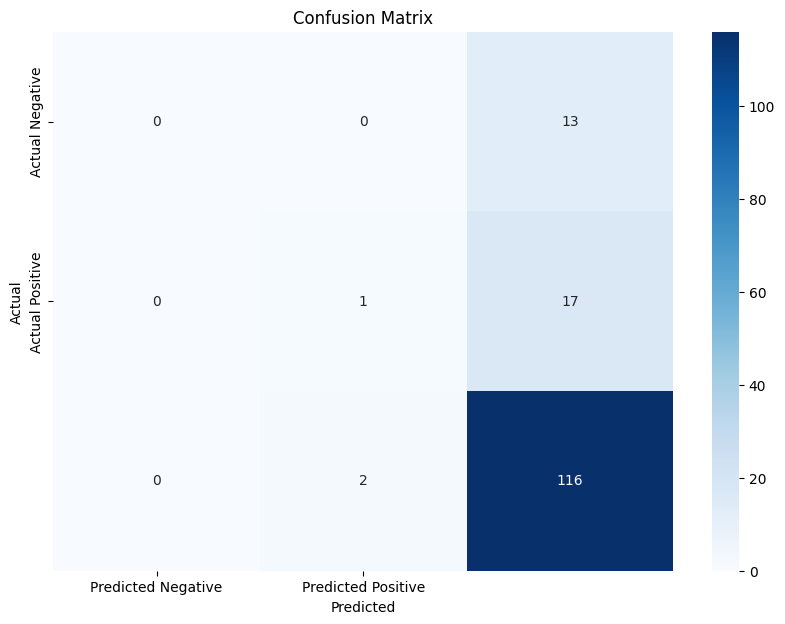

In [50]:

# evaluate the classifier's performance
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

# plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


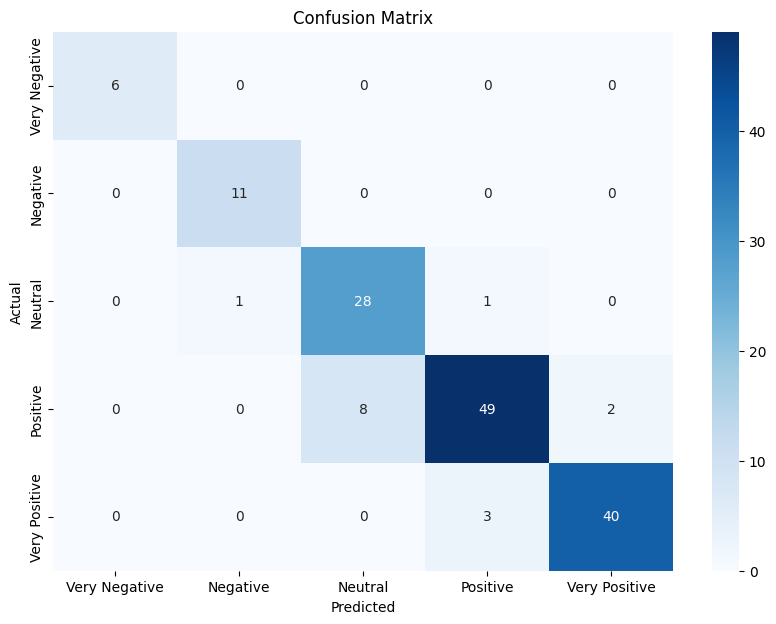

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Neutral', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Neutral', 'Actual Positive'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'], yticklabels=['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

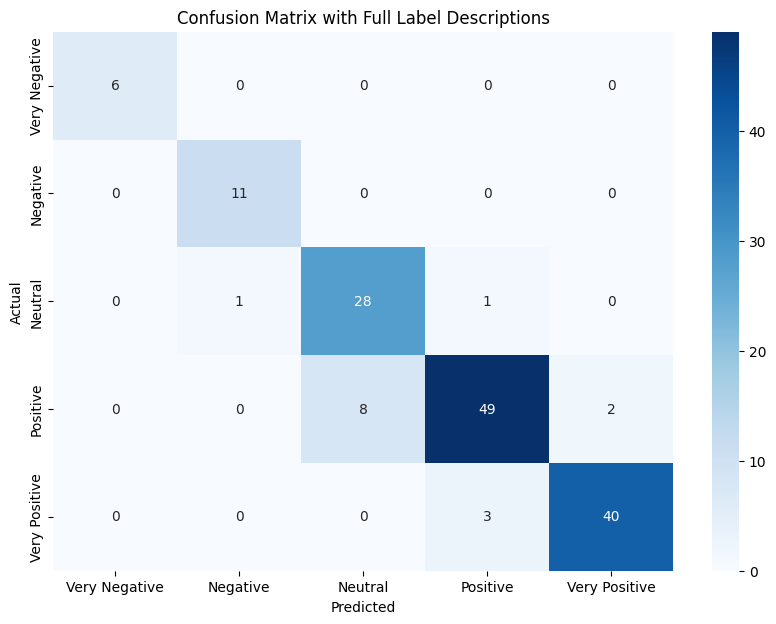

In [19]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define the full label descriptions
labels = ['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive']

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Full Label Descriptions')
plt.show()

Accuracy: 0.8993288590604027
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.92      1.00      0.96        11
           2       0.78      0.93      0.85        30
           3       0.92      0.83      0.88        59
           4       0.95      0.93      0.94        43

    accuracy                           0.90       149
   macro avg       0.91      0.94      0.92       149
weighted avg       0.91      0.90      0.90       149



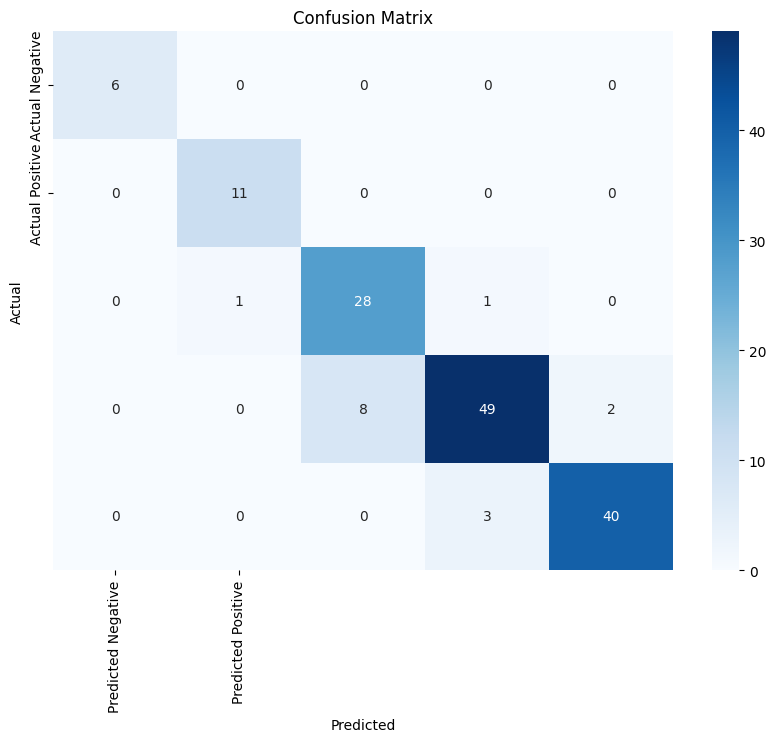

In [51]:
from wordcloud import WordCloud

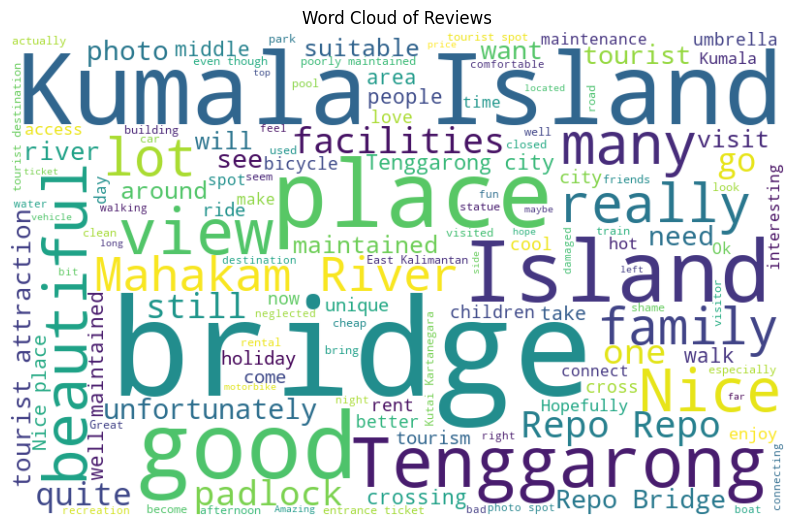

In [56]:
# path_to_datasets = "{}\\datasets".format(os.getcwd())
all_datasets = (pd.read_csv(f) for f in glob(os.path.join(path_to_datasets, "*.csv")))

# data = pd.read_csv('./datasets/dataset_jembatan_penyebrangan_pulau_kumala.csv')
data_origin = pd.concat(all_datasets, ignore_index=True)
data_origin['review'] = data_origin['review'].apply(remove_empty_review)
data_origin = data_origin.dropna(subset=['review'])

data_origin.drop(columns=['Unnamed: 0'], inplace=True)
data_origin.head()

wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                # stopwords = None, 
                min_font_size = 10).generate(' '.join(data_origin['review']))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

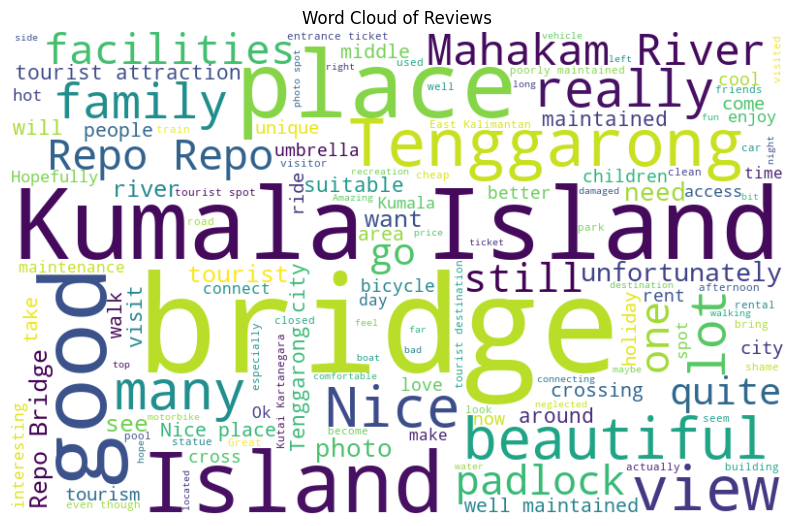

In [20]:

from wordcloud import WordCloud
from matplotlib import pyplot as plt

wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                # stopwords = None, 
                min_font_size = 10).generate(' '.join(data['review']))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

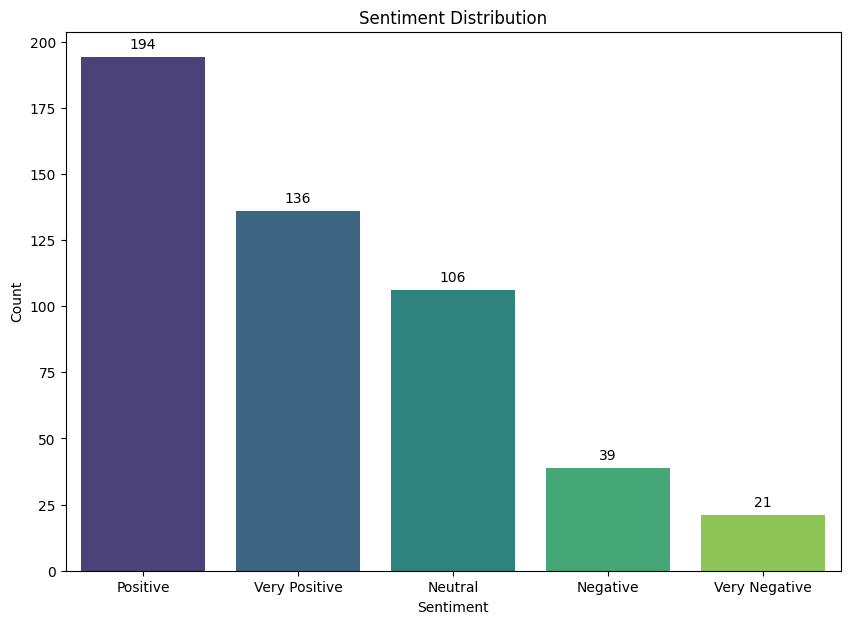

In [25]:
sentiment_counts = {
    0: 'Very Negative',
    1: 'Negative',
    2: 'Neutral',
    3: 'Positive',
    4: 'Very Positive'
}

sentiment_counts = data['sentiment'].map(sentiment_counts).value_counts()

plt.figure(figsize=(10, 7))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis', hue=sentiment_counts.index)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [24]:
data

,name,review,contrib,humanized_timestamp,minires_images,stars.label,stars.value,sentiment,bert_features
0,Fachrul Rozie F,"OK, I have it",Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,2,"[0.021978065, 0.07565795, -0.057591636, -0.515..."
1,Fachrul Rozie F,The place is good for taking photos,Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,3,"[-0.2428127, -0.61732364, -0.2426435, 0.095686..."
2,Teras,A unique and interesting island located in the...,"Local Guide · 595 reviews · 3,079 photos",4 years ago,[no_minires_images],5 stars,5,3,"[0.4399781, -0.5964806, -0.17686953, 0.4701182..."
3,baim Journey,One of the tourist destinations on Kumala Isla...,Local Guide · 99 reviews · 401 photos,6 years ago,['https://lh5.googleusercontent.com/p/AF1QipMg...,5 stars,5,3,"[0.16553363, -0.21731222, -0.16979444, 0.08522..."
4,Gustian Garang,"Amazing... As a Dayak person, I am very proud ...",4 reviews · 10 photos,a year ago,[no_minires_images],5 stars,5,4,"[0.5537336, -0.4003766, -0.14024235, -0.071828..."
...,...,...,...,...,...,...,...,...,...
577,Helwan Syarif,"Tenggarong, East Kalimantan",Local Guide · 43 reviews · 602 photos,6 years ago,[no_minires_images],5 stars,5,3,"[0.007266119, -0.15634911, -0.08427003, -0.076..."
609,Yasman ARDI,Excellent,Local Guide · 904 reviews · 438 photos,6 years ago,[no_minires_images],5 stars,5,4,"[0.41097054, -0.3704045, -0.115588754, -0.0988..."
638,Masyhurun Fiinaa,The place is not well maintained. There are lo...,Local Guide · 103 reviews · 473 photos,2 years ago,NaN,2 stars,2,1,"[-0.34447896, 0.53141594, -0.3968784, -0.66520..."
639,Irfan Yourdani,The tower is good for children's play faciliti...,"Local Guide · 819 reviews · 3,236 photos",8 years ago,NaN,4 stars,4,2,"[-0.35000232, -0.034640513, -0.2346682, -0.243..."


C:\Users\busin\AppData\Local\Temp\ipykernel_5356\1726810080.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


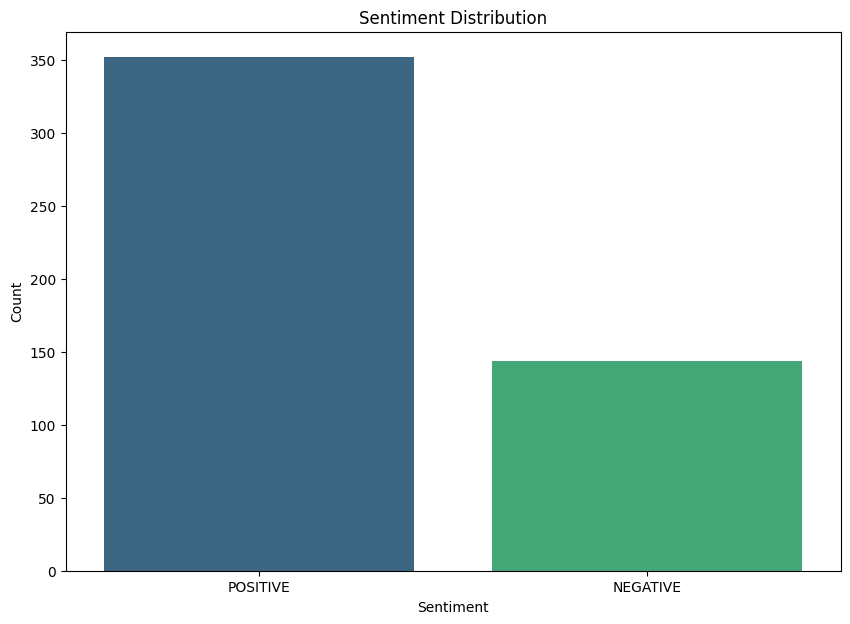

In [62]:
sentiment_counts = data['bert_sentiment'].value_counts()

plt.figure(figsize=(10, 7))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [22]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [47]:
# convert the BERT features to a list of arrays
features = np.array(data['review'].tolist())

# apply Min-Max scaling to ensure all values are non-negative
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# split the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['sentiment'], train_size=0.7, random_state=42)

# Apply chi-square feature selection to select the top 1000 features
# select the top K features (you can adjust k as needed)
k = 500 # example value, adjust based on your dataset
chi2_selector = SelectKBest(chi2, k=k)
x_train_kbest = chi2_selector.fit_transform(X_train, y_train)
X_test_kbest = chi2_selector.transform(X_test)

# train a naive bayes classifier on the selected features
clf = GaussianNB()
clf.fit(x_train_kbest, y_train)

#  make predictions on the testing data
y_pred = clf.predict(X_test_kbest)

# evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.6363636363636364
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         4
     neutral       0.16      0.25      0.19        12
    positive       0.83      0.72      0.77        83

    accuracy                           0.64        99
   macro avg       0.33      0.32      0.32        99
weighted avg       0.72      0.64      0.67        99



In [24]:
features = np.array(data['review'].tolist())

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['sentiment'], test_size=0.3, random_state=42)

k_values = [50, 100, 200, 300, 400, 500]

best_k = 0
best_score = 0

for k in k_values:
    chi2_selector = SelectKBest(chi2, k=k)
    X_train_kbest = chi2_selector.fit_transform(X_train, y_train)

    clf = BernoulliNB()

    scores = cross_val_score(clf, X_train_kbest, y_train, cv=5)
    mean_score = scores.mean()

    print(f'K: {k}, Cross-validation score: {mean_score}')

    if mean_score > best_score:
        best_k = k
        best_score = mean_score

print(f'Best K: {best_k}')
print(f'Best cross-validation score: {best_score}')

chi2_selector = SelectKBest(chi2, k=best_k)
X_train_kbest = chi2_selector.fit_transform(X_train, y_train)
X_test_kbest = chi2_selector.transform(X_test)

clf = BernoulliNB()
clf.fit(X_train_kbest, y_train)

y_pred = clf.predict(X_test_kbest)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

K: 50, Cross-validation score: 0.8040165631469979
K: 100, Cross-validation score: 0.8040165631469979
K: 200, Cross-validation score: 0.8040579710144928
K: 300, Cross-validation score: 0.7983022774327122
K: 400, Cross-validation score: 0.8069151138716357
K: 500, Cross-validation score: 0.7982608695652174
Best K: 400
Best cross-validation score: 0.8069151138716357
Accuracy: 0.785234899328859
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00        13
     neutral       0.33      0.06      0.10        18
    positive       0.79      0.98      0.88       118

    accuracy                           0.79       149
   macro avg       0.38      0.35      0.32       149
weighted avg       0.67      0.79      0.71       149



d:\suarasiy\skripsi\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\suarasiy\skripsi\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\suarasiy\skripsi\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# from sklearn.cluster import KMeans
# import numpy as np

# features = np.array(data['bert_features'].to_list())




In [39]:
# import pandas as pd
# from transformers import BertTokenizer, BertModel
# import torch
# import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Assuming 'data' is your DataFrame
# Example: data = pd.read_csv('concatenated_data.csv')

# Fill empty values in the 'review' column with a placeholder text
# data['review'].fillna('empty', inplace=True)

# Load the BERT tokenizer and model
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased')

# Function to extract features from a single review
# def extract_features(review: str):
#     # Tokenize the review
#     inputs = tokenizer(review, return_tensors="pt", truncation=True, padding=True, max_length=512)

#     # Get the hidden states from the BERT model
#     with torch.no_grad():
#         outputs = model(**inputs)

#     # The last hidden state is the output of the model
#     last_hidden_state = outputs.last_hidden_state

#     # Use the [CLS] token embedding as the sentence embedding
#     cls_embedding = last_hidden_state[:, 0, :].squeeze().numpy()

#     return cls_embedding

# Apply the feature extraction to the 'review' column
# data['bert_features'] = data['review'].apply(extract_features)

# Convert the BERT features to a list of arrays
# features = np.array(data['bert_features'].tolist())
features = np.array(data['review'].tolist())

# Apply Min-Max scaling to ensure all values are non-negative
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['bert_sentiment'], test_size=0.3, random_state=42)

# Apply Chi-Square feature selection on the training data
# Select the top k features (you can adjust k as needed)
k = 50  # Example value, adjust based on your dataset
chi2_selector = SelectKBest(chi2, k=k)
X_train_kbest = chi2_selector.fit_transform(X_train, y_train)
X_test_kbest = chi2_selector.transform(X_test)

# Train an SVM classifier on the selected features
clf = MultinomialNB()
clf.fit(X_train_kbest, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_kbest)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7248322147651006
Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.47      0.53      0.49        38
    POSITIVE       0.83      0.79      0.81       111

    accuracy                           0.72       149
   macro avg       0.65      0.66      0.65       149
weighted avg       0.74      0.72      0.73       149

